In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
enflasyon=pd.read_excel("./Datasets/tuketici fiyat endeksi ve degisim oranlari.xls")

In [3]:
inflation=enflasyon.iloc[32:50]
inflation=pd.DataFrame(inflation)
inflation

,Tüketici fiyat endeks rakamları (2003=100),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
32,2006,0.75,0.22,0.27,1.34,1.88,0.34,0.85,-0.44,1.29,1.27,1.29,0.23
33,2007,1,0.43,0.92,1.21,0.5,-0.24,-0.73,0.02,1.03,1.81,1.95,0.22
34,2008,0.8,1.29,0.96,1.68,1.49,-0.36,0.58,-0.24,0.45,2.6,0.83,-0.41
35,2009,0.29,-0.34,1.1,0.02,0.64,0.11,0.25,-0.3,0.39,2.41,1.27,0.53
36,2010,1.85,1.45,0.58,0.6,-0.36,-0.56,-0.48,0.4,1.23,1.83,0.03,-0.3
37,2011,0.41,0.73,0.42,0.87,2.42,-1.43,-0.41,0.73,0.75,3.27,1.73,0.58
38,2012,0.56,0.56,0.41,1.52,-0.21,-0.9,-0.23,0.56,1.03,1.96,0.38,0.38
39,2013,1.65,0.3,0.66,0.42,0.15,0.76,0.31,-0.1,0.77,1.8,0.01,0.46
40,2014,1.98,0.43,1.13,1.34,0.4,0.31,0.45,0.09,0.14,1.9,0.18,-0.44
41,2015,1.1,0.71,1.19,1.63,0.56,-0.51,0.09,0.4,0.89,1.55,0.67,0.21


In [4]:
inflation = inflation.set_axis(["Yil","Ocak","Şubat","Mart","Nisan","Mayis","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasim","Aralik"], axis=1)
inflation

,Yil,Ocak,Şubat,Mart,Nisan,Mayis,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasim,Aralik
32,2006,0.75,0.22,0.27,1.34,1.88,0.34,0.85,-0.44,1.29,1.27,1.29,0.23
33,2007,1,0.43,0.92,1.21,0.5,-0.24,-0.73,0.02,1.03,1.81,1.95,0.22
34,2008,0.8,1.29,0.96,1.68,1.49,-0.36,0.58,-0.24,0.45,2.6,0.83,-0.41
35,2009,0.29,-0.34,1.1,0.02,0.64,0.11,0.25,-0.3,0.39,2.41,1.27,0.53
36,2010,1.85,1.45,0.58,0.6,-0.36,-0.56,-0.48,0.4,1.23,1.83,0.03,-0.3
37,2011,0.41,0.73,0.42,0.87,2.42,-1.43,-0.41,0.73,0.75,3.27,1.73,0.58
38,2012,0.56,0.56,0.41,1.52,-0.21,-0.9,-0.23,0.56,1.03,1.96,0.38,0.38
39,2013,1.65,0.3,0.66,0.42,0.15,0.76,0.31,-0.1,0.77,1.8,0.01,0.46
40,2014,1.98,0.43,1.13,1.34,0.4,0.31,0.45,0.09,0.14,1.9,0.18,-0.44
41,2015,1.1,0.71,1.19,1.63,0.56,-0.51,0.09,0.4,0.89,1.55,0.67,0.21


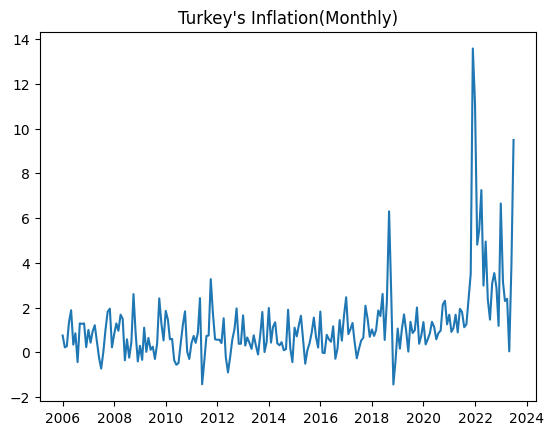

In [5]:
dates=pd.date_range('2006-01-01','2024-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()
del inflation["Yil"]
v=np.array(inflation.values)
v=v.flatten()
df["Inflation"]=v
df=df.set_index(dates)
plt.figure()
plt.title("Turkey's Inflation(Monthly)")

plt.plot(df)
plt.show()


In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df=df.drop(df.index[0])
df

,Inflation
2006-02-01,0.22
2006-03-01,0.27
2006-04-01,1.34
2006-05-01,1.88
2006-06-01,0.34
...,...
2023-03-01,2.29
2023-04-01,2.39
2023-05-01,0.04
2023-06-01,3.92


In [8]:
usd=pd.read_csv("./Datasets/USD_TRY Geçmiş Verileri (2).csv")


In [9]:
df1=pd.DataFrame()
df1["USD/TL"]=usd["Fark %"]
df1=df1.applymap(lambda x: str(x.replace(',','.')))
df1=df1.applymap(lambda x: str(x.replace('%','')))
df1["USD/TL"]=df1["USD/TL"].astype(float)
df1=df1.loc[12:,:]
df1

,USD/TL
12,-2.05
13,-0.67
14,2.32
15,-1.64
16,18.98
...,...
218,1.54
219,1.43
220,6.72
221,25.49


In [10]:
df6=pd.DataFrame()
df6["USD/TL"]=usd["Şimdi"]
df6=df6.applymap(lambda x: str(x.replace(',','.')))

df6["USD/TL"]=df6["USD/TL"].astype(float)
df6=df6.loc[13:,:]
df6

,USD/TL
13,1.3140
14,1.3445
15,1.3225
16,1.5735
17,1.5825
...,...
218,19.1793
219,19.4530
220,20.7596
221,26.0511


In [11]:
dates= pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df6=df6.set_index(dates)

df6

,USD/TL
2006-02-01,1.3140
2006-03-01,1.3445
2006-04-01,1.3225
2006-05-01,1.5735
2006-06-01,1.5825
...,...
2023-03-01,19.1793
2023-04-01,19.4530
2023-05-01,20.7596
2023-06-01,26.0511


In [12]:
dates= pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df1=df1.set_index(dates)
df1=df1.drop("2023-08-01")
df1


,USD/TL
2006-02-01,-2.05
2006-03-01,-0.67
2006-04-01,2.32
2006-05-01,-1.64
2006-06-01,18.98
...,...
2023-03-01,0.40
2023-04-01,1.54
2023-05-01,1.43
2023-06-01,6.72


In [13]:
#Cleaning the data
money_supply=pd.read_excel("./Datasets/EVDS.xlsx")
del money_supply['Unnamed: 2']
money_supply=money_supply.drop([226,229])
money_supply.dropna(axis=0,inplace=True)
money_supply=money_supply.drop(money_supply.index[0])
money_supply.columns=["Tarih","Para Arzi"]
money_supply["Para Arzi"]=money_supply["Para Arzi"].astype(float)
money_supply


,Tarih,Para Arzi
12,2006-01,2.605798e+08
13,2006-02,2.663248e+08
14,2006-03,2.731552e+08
15,2006-04,2.767716e+08
16,2006-05,3.025340e+08
...,...,...
218,2023-03,9.289651e+09
219,2023-04,9.735209e+09
220,2023-05,9.623990e+09
221,2023-06,1.110990e+10


In [14]:
dates=pd.date_range('2006-02-01','2023-09-01' , freq='1M')-pd.offsets.MonthBegin(1)


#money_supply=money_supply.drop(money_supply.index[0])
money_supply


,Tarih,Para Arzi
12,2006-01,2.605798e+08
13,2006-02,2.663248e+08
14,2006-03,2.731552e+08
15,2006-04,2.767716e+08
16,2006-05,3.025340e+08
...,...,...
218,2023-03,9.289651e+09
219,2023-04,9.735209e+09
220,2023-05,9.623990e+09
221,2023-06,1.110990e+10


In [15]:
money_supply=money_supply.set_index(dates)
money_supply["Para Arzi"]=money_supply["Para Arzi"]/1e+08
money_supply
dfn=pd.DataFrame()


In [16]:


# Bir önceki satıra göre yüzde değişimi hesaplamak için 'Degisken' sütununu kaydırın
dfn['Para Arzi'] = money_supply["Para Arzi"].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
dfn["Para Arzi"].fillna(0, inplace=True)
dfn=pd.DataFrame(dfn)
# Sonuçları görelim
#dfn=dfn.drop(dfn.index[210])

dfn=dfn.drop(dfn.index[210])
dfn


,Para Arzi
2006-02-01,0.000000
2006-03-01,2.204708
2006-04-01,2.564688
2006-05-01,1.323922
2006-06-01,9.308200
...,...
2023-03-01,2.543211
2023-04-01,4.189763
2023-05-01,4.796282
2023-06-01,-1.142443


In [17]:
brent=pd.read_csv("./Datasets/Brent Petrol Vadeli İşlemleri Geçmiş Verileri.csv")

In [91]:
brent1=brent["Şimdi"]
brent1=brent1.str.replace(',','.')
brent1=brent1.astype(float)
#brent1=pd.DataFrame(brent.loc[:231])
brent1=pd.DataFrame(brent1)
brent1=brent1.drop(brent1.index[0])
brent1=brent1.loc[13:,:]
brent1

,Şimdi
13,61.76
14,65.91
15,72.50
16,70.41
17,73.51
...,...
218,79.77
219,79.54
220,72.66
221,74.90


In [92]:
df2=pd.DataFrame()
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)

df2["Brent"]=brent1["Şimdi"]
df2["TIME"]=dates
df2['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df2['TIME'] =  pd.to_datetime(df2['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df2 = df2.set_index(['TIME'])
df2

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_7540\491950372.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['TIME'] =  pd.to_datetime(df2['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Brent
TIME,
2006-02-01,61.76
2006-03-01,65.91
2006-04-01,72.50
2006-05-01,70.41
2006-06-01,73.51
...,...
2023-03-01,79.77
2023-04-01,79.54
2023-05-01,72.66


In [94]:
dfn2=pd.DataFrame()
dfn2['Brent'] = df2['Brent'].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
dfn2["Brent"].fillna(0, inplace=True)
dfn2=pd.DataFrame(dfn2)
dfn2

,Brent
TIME,
2006-02-01,0.000000
2006-03-01,6.719560
2006-04-01,9.998483
2006-05-01,-2.882759
2006-06-01,4.402784
...,...
2023-03-01,-4.911193
2023-04-01,-0.288329
2023-05-01,-8.649736


In [72]:
kredi=pd.read_excel("./Datasets/EVDS (2).xlsx")
dates=pd.date_range('2006-01-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
kredi=kredi["TP KREDI L001"]
kredi=pd.DataFrame(kredi)
kredi=kredi.loc[:210,:]
kredi["TP KREDI L001"]=kredi["TP KREDI L001"].astype(float)
kredi=kredi/1e+07
kredi=kredi.drop(kredi.index[210])

kredi

,TP KREDI L001
0,13.606339
1,13.818467
2,14.812223
3,15.275095
4,16.648809
...,...
205,771.126924
206,821.099154
207,857.211386
208,880.434409


In [73]:
df3=pd.DataFrame()
df3["Kredi"]=kredi["TP KREDI L001"]
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
df3["TIME"]=dates
df3['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df3 = df3.set_index(['TIME'])
df3

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_7540\479190843.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df3['TIME'] =  pd.to_datetime(df3['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Kredi
TIME,
2006-02-01,13.606339
2006-03-01,13.818467
2006-04-01,14.812223
2006-05-01,15.275095
2006-06-01,16.648809
...,...
2023-03-01,771.126924
2023-04-01,821.099154
2023-05-01,857.211386


In [74]:
df3['Kredi'] = df3["Kredi"].pct_change() * 100
from datetime import datetime
# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
df3["Kredi"].fillna(0, inplace=True)
df3=pd.DataFrame(df3)
df3



,Kredi
TIME,
2006-02-01,0.000000
2006-03-01,1.559036
2006-04-01,7.191509
2006-05-01,3.124932
2006-06-01,8.993162
...,...
2023-03-01,2.707630
2023-04-01,6.480416
2023-05-01,4.398035


In [75]:
faiz=pd.read_excel("./Datasets/EVDS (5).xlsx")
dates=pd.date_range('2006-02-01','2023-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
faiz=faiz["TP KTFTUK"]
faiz=pd.DataFrame(faiz)
faiz=faiz.loc[:209,:]
faiz["TP KTFTUK"]=faiz["TP KTFTUK"].astype(float)
faiz

,TP KTFTUK
0,17.2975
1,17.0080
2,16.2075
3,16.3000
4,19.6700
...,...
205,26.5080
206,29.2275
207,32.0225
208,38.5600


In [76]:
df4=pd.DataFrame()
df4["Faiz"]=faiz["TP KTFTUK"]
df4["TIME"]=dates
df4['TIME'].replace(regex=True,inplace=True, to_replace='M',value='')
df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df4 = df4.set_index(['TIME'])
df4

C:\Users\BoraKAYAPEAKUP\AppData\Local\Temp\ipykernel_7540\1007059295.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['TIME'] =  pd.to_datetime(df4['TIME'], format='%Y%m', errors='ignore', infer_datetime_format=True)


,Faiz
TIME,
2006-02-01,17.2975
2006-03-01,17.0080
2006-04-01,16.2075
2006-05-01,16.3000
2006-06-01,19.6700
...,...
2023-03-01,26.5080
2023-04-01,29.2275
2023-05-01,32.0225


In [95]:
X=pd.concat([df1["USD/TL"],dfn["Para Arzi"],df4["Faiz"],df3["Kredi"]],axis=1)
X=pd.concat([X,dfn2.Brent],axis=1)


In [78]:
y=pd.DataFrame(df["Inflation"])
y["Inflation"]=y["Inflation"].astype(float)
y


,Inflation
2006-02-01,0.22
2006-03-01,0.27
2006-04-01,1.34
2006-05-01,1.88
2006-06-01,0.34
...,...
2023-03-01,2.29
2023-04-01,2.39
2023-05-01,0.04
2023-06-01,3.92


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [153]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin
X_train_with_const = sm.add_constant(X_train)

# OLS (En Küçük Karelerle) modelini oluşturalım ve eğitelim
model_ols = sm.OLS(y_train, X_train_with_const)
results = model_ols.fit()

# Modelin özetini görüntüleyin
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     33.27
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.57e-22
Time:                        09:34:47   Log-Likelihood:                -251.03
No. Observations:                 147   AIC:                             514.1
Df Residuals:                     141   BIC:                             532.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0453      0.398     -5.141      0.0

In [154]:
results.params

const       -2.045346
USD/TL       0.018723
Para Arzi    0.215462
Faiz         0.130903
Kredi        0.195791
Brent        0.016827
dtype: float64

In [595]:
from pmdarima.arima import auto_arima

results = auto_arima(brent2, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1471.733, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1407.713, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1456.080, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1387.086, Time=0.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1399.136, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1389.035, Time=0.74 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1389.041, Time=0.59 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1387.701, Time=0.50 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=inf, Time=4.80 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=1389.082, Time=1.78 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]       

In [104]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df2.astype(float),
                                order=(1,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


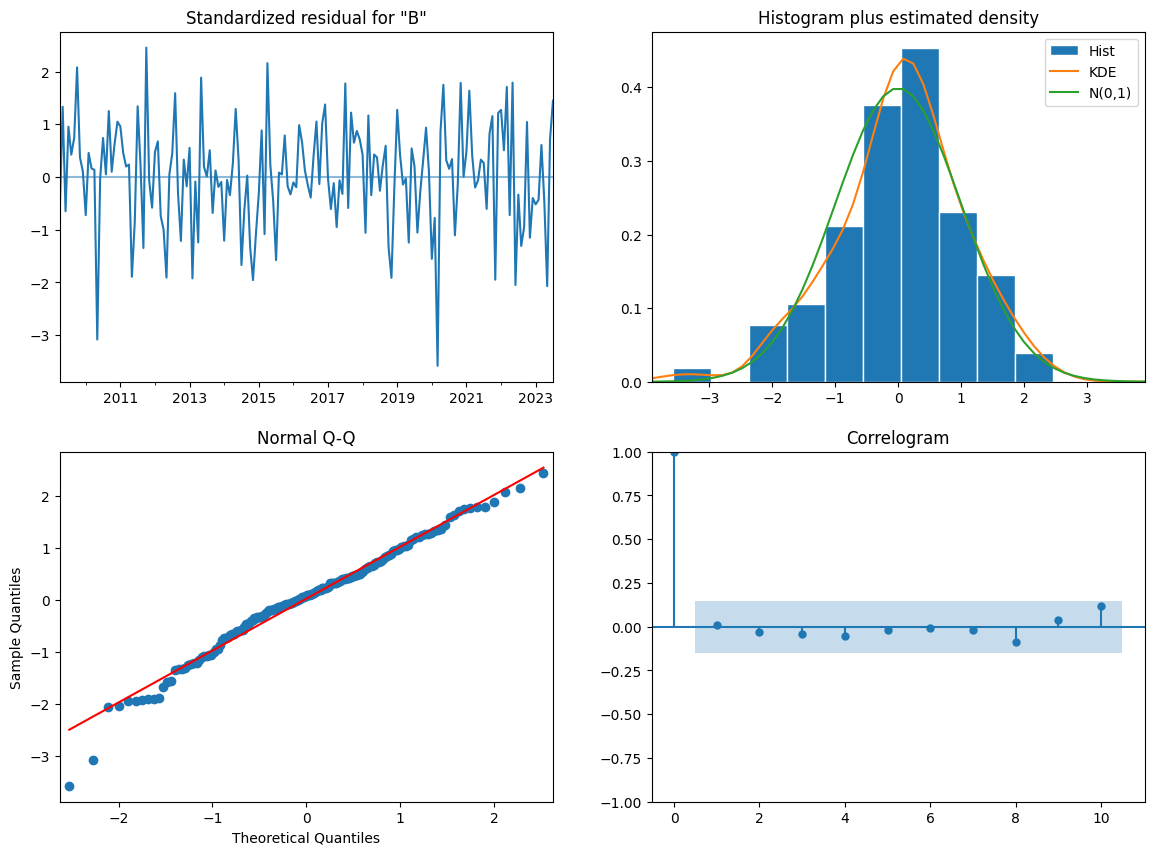

In [105]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [106]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [108]:
pred_ci['Predicted'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
pred_ci['Observed'] = df2["Brent"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Brent,upper Brent,Predicted,Observed,"Diff, %%"
2022-10-01,72.181296,101.754105,86.967701,94.83,-8.290941
2022-11-01,79.328938,108.901747,94.115342,85.43,10.166618
2022-12-01,74.132157,103.704966,88.918562,85.91,3.501993
2023-01-01,73.622136,103.194945,88.408541,84.49,4.637875
2023-02-01,72.380142,101.952951,87.166546,83.89,3.905765
2023-03-01,60.406841,89.979650,75.193245,79.77,-5.737439
2023-04-01,68.197888,97.770697,82.984292,79.54,4.330264
2023-05-01,73.491663,103.064472,88.278067,72.66,21.494725
2023-06-01,54.633187,84.205996,69.419592,74.90,-7.316967
2023-07-01,59.716441,89.289250,74.502845,85.43,-12.790770


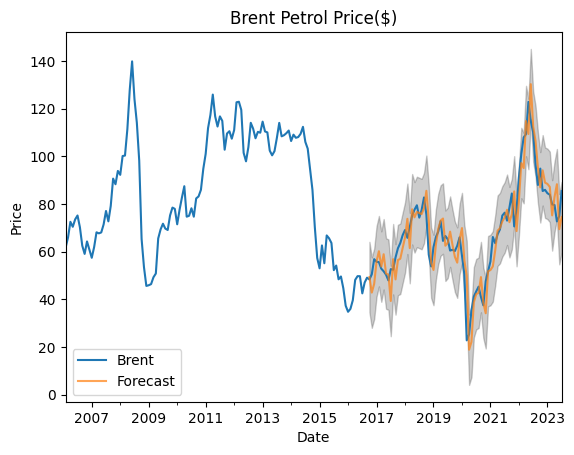

In [109]:
ax = df2['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")
plt.legend()
plt.show()

In [110]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

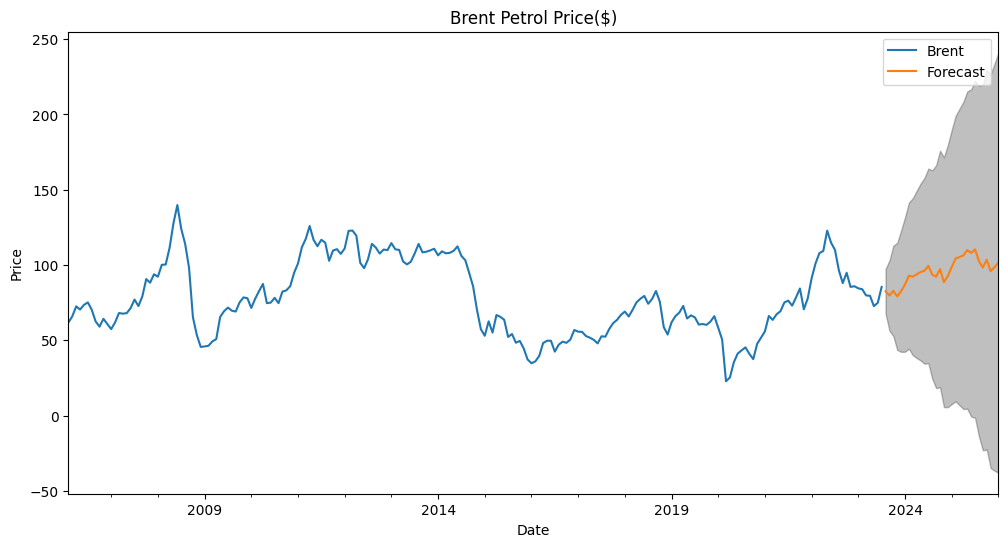

In [111]:
ax = df2.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("Brent Petrol Price($)")

plt.legend()

plt.show()

In [116]:
pred_ci['Mean'] = (pred_ci["lower Brent"] + pred_ci["upper Brent"])/2
brenttahmin=pred_ci["Mean"]
brenttahmin=brenttahmin*0.90
brenttahmin
dfn3=pd.DataFrame()
dfn3['Brent'] = brenttahmin.pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
dfn3['Brent'].fillna(0, inplace=True)
dfn3=pd.DataFrame(dfn3)
brenttahmin=dfn3

In [117]:
from pmdarima.arima import auto_arima

results = auto_arima(dfn, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1099.724, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1029.197, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1053.580, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1017.019, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.21 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1062.289, Time=0.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=999.280, Time=0.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1008.566, Time=0.18 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=4.17 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=995.227, Time=0.48 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1003.089

In [118]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfn.astype(float),
                                order=(0,1,1),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [119]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [120]:
pred_ci['Predicted'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
pred_ci['Observed'] = dfn["Para Arzi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Para Arzi,upper Para Arzi,Predicted,Observed,"Diff, %%"
2022-10-01,-1.361590,8.721188,3.679799,3.286034,11.982993
2022-11-01,0.175247,10.258024,5.216635,3.796904,37.391828
2022-12-01,1.304765,11.387542,6.346154,2.626402,141.629189
2023-01-01,-1.798224,8.284551,3.243163,4.337760,-25.234137
2023-02-01,-2.620021,7.462754,2.421366,2.553007,-5.156303
2023-03-01,-2.189471,7.893304,2.851917,2.543211,12.138431
2023-04-01,0.985924,11.068698,6.027311,4.189763,43.858036
2023-05-01,0.367607,10.450381,5.408994,4.796282,12.774718
2023-06-01,-0.143335,9.939438,4.898052,-1.142443,-528.734915
2023-07-01,-0.377748,9.705025,4.663638,15.439600,-69.794307


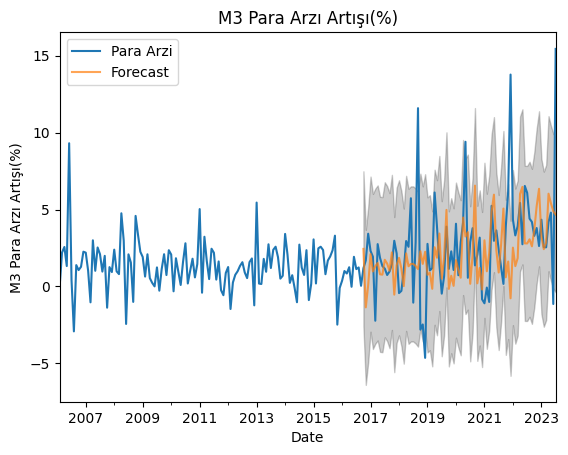

In [121]:
ax = dfn['2003':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('M3 Para Arzı Artışı(%)')
plt.title("M3 Para Arzı Artışı(%)")
plt.legend()
plt.show()

In [122]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

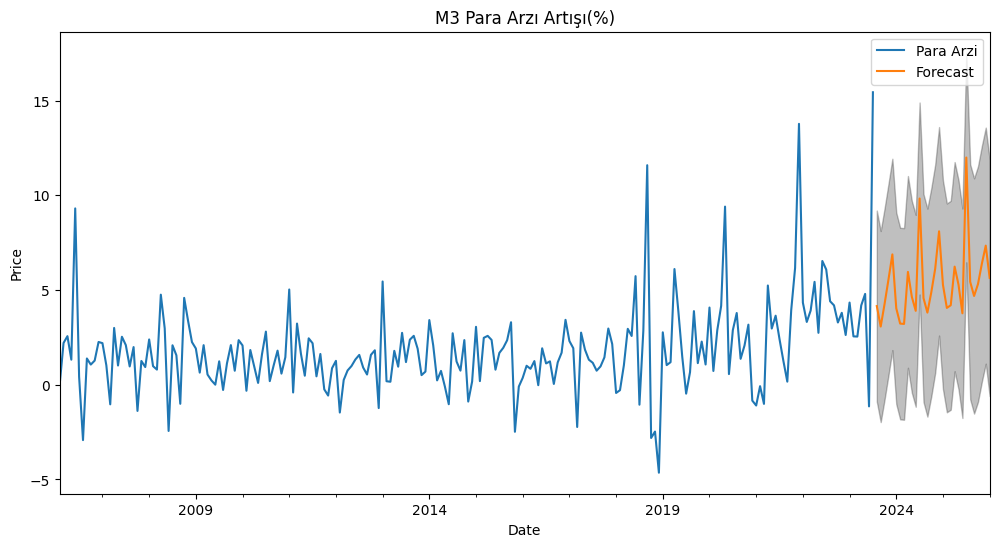

In [123]:
ax = dfn.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("M3 Para Arzı Artışı(%)")

plt.legend()

plt.show()

In [124]:
pred_ci['Mean'] = (pred_ci["lower Para Arzi"] + pred_ci["upper Para Arzi"])/2
paraarzitahmin=pred_ci["Mean"]
paraarzitahmin.iloc[12:25]=(paraarzitahmin.iloc[12:25]/3.77)+1
paraarzitahmin=paraarzitahmin*0.5
paraarzitahmin

2023-08-01    2.076480
2023-09-01    1.535508
2023-10-01    2.134655
2023-11-01    2.778512
2023-12-01    3.439983
2024-01-01    2.017165
2024-02-01    1.614232
2024-03-01    1.605385
2024-04-01    2.978326
2024-05-01    2.321338
2024-06-01    1.951373
2024-07-01    4.915106
2024-08-01    1.106646
2024-09-01    1.004915
2024-10-01    1.146967
2024-11-01    1.311570
2024-12-01    1.574223
2025-01-01    1.199246
2025-02-01    1.037982
2025-03-01    1.056476
2025-04-01    1.326781
2025-05-01    1.199856
2025-06-01    1.000163
2025-07-01    2.090725
2025-08-01    1.220340
2025-09-01    2.343409
2025-10-01    2.655850
2025-11-01    3.193875
2025-12-01    3.671433
2026-01-01    2.820186
Freq: MS, Name: Mean, dtype: float64

In [312]:
from pmdarima.arima import auto_arima

results = auto_arima(df6, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=325.013, Time=0.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=374.324, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=328.134, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=324.438, Time=0.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=376.034, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=325.115, Time=0.65 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=325.299, Time=1.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=328.610, Time=0.18 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=325.954, Time=2.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=328.785, Time=0.21 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=323.882, Time=0.42 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=377.512, Time=0.06 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=323.987, Time=0.85 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=324.246, Time=1.94 sec
 ARIMA(0,1,2)(1,1,0)[12]         

In [125]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df6.astype(float),
                                order=(3,1,0),
                                seasonal_order=(2, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [126]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [127]:
pred_ci['Predicted'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
pred_ci['Observed'] = df6["USD/TL"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower USD/TL,upper USD/TL,Predicted,Observed,"Diff, %%"
2022-10-01,17.649555,19.874352,18.761954,18.6151,0.788895
2022-11-01,17.676692,19.901489,18.789090,18.6121,0.950943
2022-12-01,17.182866,19.407662,18.295264,18.6905,-2.114636
2023-01-01,17.628168,19.852965,18.740566,18.8115,-0.377076
2023-02-01,18.027792,20.252588,19.140190,18.8875,1.337868
2023-03-01,18.419957,20.644753,19.532355,19.1793,1.840814
2023-04-01,18.067139,20.291936,19.179537,19.4530,-1.405762
2023-05-01,18.661756,20.886553,19.774155,20.7596,-4.746938
2023-06-01,20.140617,22.365414,21.253016,26.0511,-18.417973
2023-07-01,26.119934,28.344731,27.232333,26.9368,1.097134


In [128]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

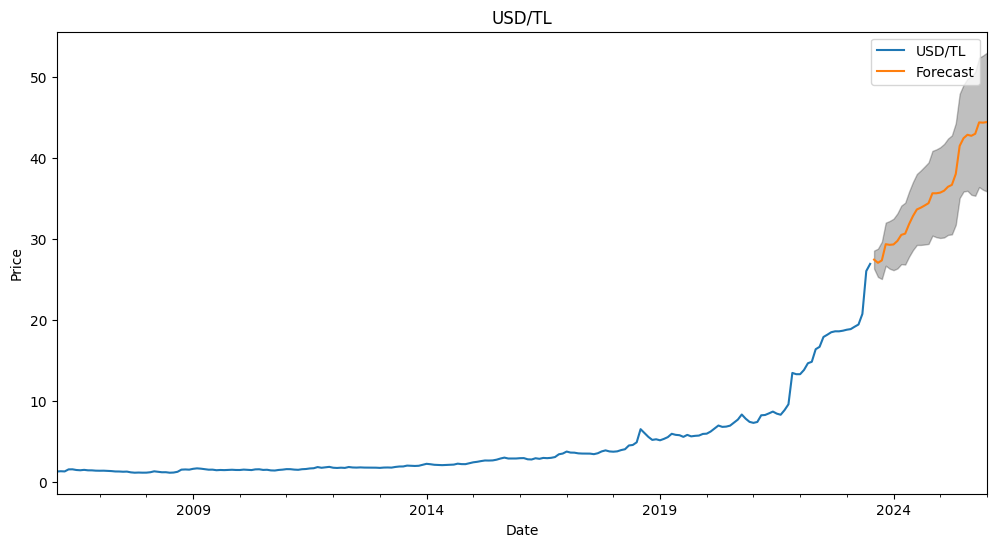

In [129]:
ax = df6.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title("USD/TL")

plt.legend()

plt.show()

In [130]:
pred_ci['Mean'] = (pred_ci["lower USD/TL"] + pred_ci["upper USD/TL"])/2
usdtahmin=pred_ci["Mean"]
usdtahmin.iloc[7:]=usdtahmin.iloc[7:]-2.5

usdtahmin

2023-08-01    27.458878
2023-09-01    27.068518
2023-10-01    27.367973
2023-11-01    29.367069
2023-12-01    29.285533
2024-01-01    29.333133
2024-02-01    29.768245
2024-03-01    28.016539
2024-04-01    28.169909
2024-05-01    29.343276
2024-06-01    30.341212
2024-07-01    31.151454
2024-08-01    31.370054
2024-09-01    31.640493
2024-10-01    31.927195
2024-11-01    33.150969
2024-12-01    33.148994
2025-01-01    33.229796
2025-02-01    33.467088
2025-03-01    33.954121
2025-04-01    34.187234
2025-05-01    35.533839
2025-06-01    38.994779
2025-07-01    39.949127
2025-08-01    40.369379
2025-09-01    40.242901
2025-10-01    40.495340
2025-11-01    41.897805
2025-12-01    41.866487
2026-01-01    41.936653
Freq: MS, Name: Mean, dtype: float64

In [316]:
from pmdarima.arima import auto_arima

results = auto_arima(df3, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=7679.414, Time=0.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7764.958, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7718.430, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=7728.504, Time=0.51 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=7730.169, Time=0.38 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=7680.247, Time=1.84 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=7680.458, Time=3.95 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=7684.664, Time=1.45 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=7681.338, Time=6.13 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=7714.771, Time=0.25 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=7678.368, Time=1.37 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=7732.373, Time=0.33 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=7679.223, Time=1.76 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=7679.423, Time=4.46 sec
 ARIMA(2,1,1)(1,1,0

In [131]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df3.astype(float),
                                order=(3,1,0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [132]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [133]:
pred_ci['Predicted'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
pred_ci['Observed'] = df3["Kredi"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Kredi,upper Kredi,Predicted,Observed,"Diff, %%"
2022-10-01,-1.239067,6.968968,2.864950,3.119877,-8.171051
2022-11-01,-1.671532,6.536503,2.432486,2.757306,-11.780341
2022-12-01,-1.422294,6.785742,2.681724,2.988393,-10.261994
2023-01-01,-0.705659,7.502376,3.398359,4.766302,-28.700310
2023-02-01,-1.275460,6.932575,2.828557,3.058929,-7.531111
2023-03-01,-0.816504,7.391524,3.287510,2.707630,21.416533
2023-04-01,0.405274,8.613254,4.509264,6.480416,-30.417061
2023-05-01,0.810017,9.017883,4.913950,4.398035,11.730565
2023-06-01,1.092037,9.285859,5.188948,2.709136,91.535160
2023-07-01,-0.428401,7.765421,3.668510,8.635060,-57.516106


In [134]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

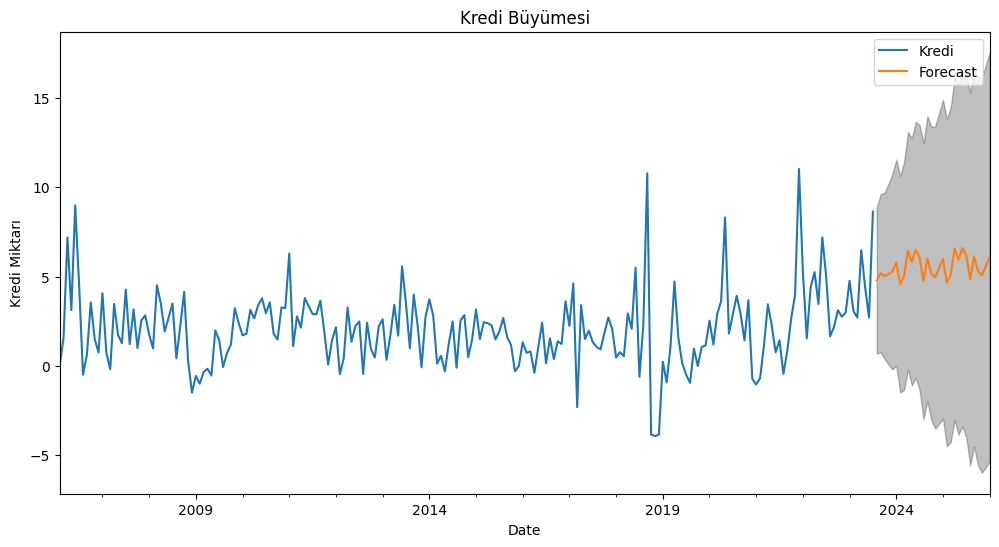

In [135]:
ax = df3.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Kredi Miktarı')
plt.title("Kredi Büyümesi")

plt.legend()

plt.show()

In [136]:
pred_ci['Mean'] = (pred_ci["lower Kredi"] + pred_ci["upper Kredi"])/2
kreditahmin=pred_ci["Mean"]
kreditahmin=kreditahmin*-0.1
kreditahmin


2023-08-01   -0.478993
2023-09-01   -0.519172
2023-10-01   -0.503847
2023-11-01   -0.513496
2023-12-01   -0.528473
2024-01-01   -0.578279
2024-02-01   -0.457781
2024-03-01   -0.502769
2024-04-01   -0.644450
2024-05-01   -0.581990
2024-06-01   -0.649760
2024-07-01   -0.606480
2024-08-01   -0.474345
2024-09-01   -0.600894
2024-10-01   -0.518137
2024-11-01   -0.495524
2024-12-01   -0.545622
2025-01-01   -0.597894
2025-02-01   -0.465712
2025-03-01   -0.511575
2025-04-01   -0.657311
2025-05-01   -0.593749
2025-06-01   -0.660336
2025-07-01   -0.617643
2025-08-01   -0.485816
2025-09-01   -0.612104
2025-10-01   -0.529288
2025-11-01   -0.506776
2025-12-01   -0.556877
2026-01-01   -0.609113
Freq: MS, Name: Mean, dtype: float64

In [119]:
from pmdarima.arima import auto_arima

results = auto_arima(df4, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=883.939, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=741.388, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=806.408, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=712.030, Time=0.38 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=697.632, Time=1.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=698.421, Time=0.34 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=699.647, Time=2.26 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=697.593, Time=1.84 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=696.721, Time=1.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=701.290, Time=0.32 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=769.188, Time=0.82 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=691.262, Time=1.28 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AI

In [137]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df4.astype(float),
                                order=(2,1,0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\BoraKAYAPEAKUP\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [138]:
pred = results.get_prediction(start=pd.to_datetime('2021-10-01'), dynamic=False)
pred_ci = pred.conf_int()

In [139]:
pred_ci['Predicted'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
pred_ci['Observed'] = df4["Faiz"]
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(10)

,lower Faiz,upper Faiz,Predicted,Observed,"Diff, %%"
2022-10-01,27.747667,32.856398,30.302033,30.2500,0.172009
2022-11-01,26.626906,31.735637,29.181271,29.6650,-1.630638
2022-12-01,26.883527,31.992258,29.437893,28.7180,2.506765
2023-01-01,24.970852,30.079583,27.525218,28.6800,-4.026438
2023-02-01,25.848379,30.957109,28.402744,28.2550,0.522895
2023-03-01,25.256450,30.365180,27.810815,26.5080,4.914800
2023-04-01,23.311798,28.420528,25.866163,29.2275,-11.500598
2023-05-01,28.958270,34.067000,31.512635,32.0225,-1.592210
2023-06-01,30.988359,36.097088,33.542723,38.5600,-13.011609
2023-07-01,39.843205,44.951935,42.397570,45.8250,-7.479390


In [140]:
# Get forecast in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

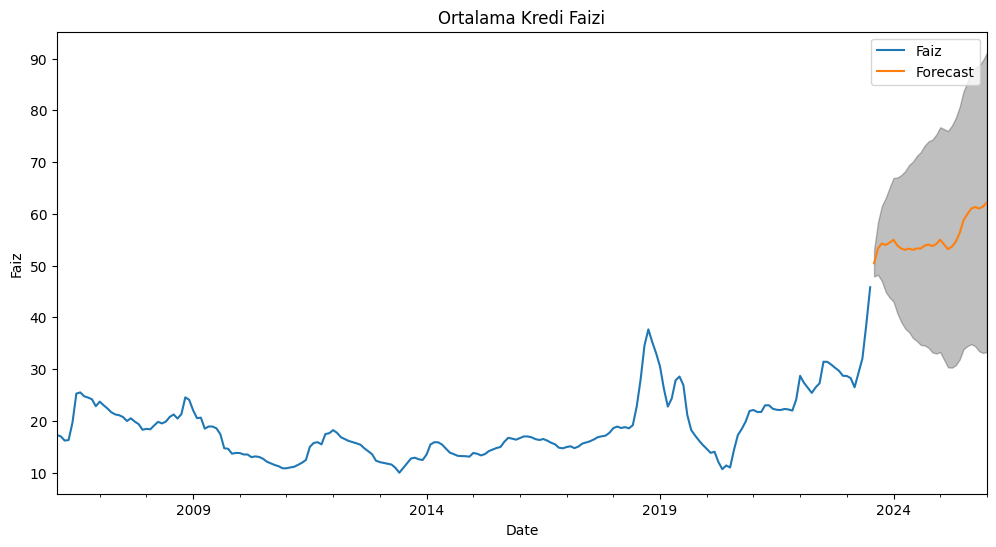

In [141]:
ax = df4.plot(label='observed', figsize=(12, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Faiz')
plt.title("Ortalama Kredi Faizi")

plt.legend()

plt.show()

In [142]:
pred_ci['Mean'] = (pred_ci["lower Faiz"] + pred_ci["upper Faiz"])/2
faiztahmin=pred_ci["Mean"]
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
faiztahmin.iloc[8:]=faiztahmin.iloc[8:]*0.6
faiztahmin

,Faiz
2023-08-01,50.454932
2023-09-01,53.304999
2023-10-01,54.270144
2023-11-01,53.990018
2023-12-01,54.443113
2024-01-01,54.983942
2024-02-01,53.882194
2024-03-01,53.291732
2024-04-01,31.824289
2024-05-01,31.968702


In [143]:
dict={'Tarih':["2023-08-01","2023-09-01","2023-10-01","2023-11-01","2023-12-01"],'Inflation':["5.7","4.88","5.58","6.21","6.45"]}
df7=pd.DataFrame.from_dict(dict)
df7.columns=["Tarih","Inflation"]



df7

,Tarih,Inflation
0,2023-08-01,5.7
1,2023-09-01,4.88
2,2023-10-01,5.58
3,2023-11-01,6.21
4,2023-12-01,6.45


In [144]:
inflationnew=[54,56.2,59.69,64.85,73.43]
dates=pd.date_range('2023-08-01','2024-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
inflationpr=pd.DataFrame()
inflationpr["Inflation"]=inflationnew
inflationpr=inflationpr.set_index(dates)
inflation1=enflasyon.loc[82:101,:]
inflation1

,Tüketici fiyat endeks rakamları (2003=100),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
82,2004,10.59,9.48,8.4,7.87,7.31,7.08,7.79,8.45,8.01,9.43,9.47,9.35
83,2005,9.23,8.69,7.94,8.18,8.7,8.95,7.82,7.91,7.99,7.52,7.61,7.72
84,2006,7.93,8.15,8.16,8.83,9.86,10.12,11.69,10.26,10.55,9.98,9.86,9.65
85,2007,9.93,10.16,10.86,10.72,9.23,8.6,6.9,7.39,7.12,7.7,8.4,8.39
86,2008,8.17,9.1,9.15,9.66,10.74,10.61,12.06,11.77,11.13,11.99,10.76,10.06
87,2009,9.5,7.73,7.89,6.13,5.24,5.73,5.39,5.33,5.27,5.08,5.53,6.53
88,2010,8.19,10.13,9.56,10.19,9.1,8.37,7.58,8.33,9.24,8.62,7.29,6.4
89,2011,4.9,4.16,3.99,4.26,7.17,6.24,6.31,6.65,6.15,7.66,9.48,10.45
90,2012,10.61,10.43,10.43,11.14,8.28,8.87,9.07,8.88,9.19,7.8,6.37,6.16
91,2013,7.31,7.03,7.29,6.13,6.51,8.3,8.88,8.17,7.88,7.71,7.32,7.4


In [145]:
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin['Tahmin'] = usdtahmin["Mean"].pct_change() * 100

# İlk satırdaki değerlere NaN dönecektir, bunları 0 ile dolduralım
usdtahmin["Tahmin"].fillna(0, inplace=True)
usdtahmin=pd.DataFrame(usdtahmin)
usdtahmin.iloc[0,1]=1.81
usdtahmin

,Mean,Tahmin
2023-08-01,27.458878,1.810000
2023-09-01,27.068518,-1.421616
2023-10-01,27.367973,1.106287
2023-11-01,29.367069,7.304509
2023-12-01,29.285533,-0.277645
2024-01-01,29.333133,0.162538
2024-02-01,29.768245,1.483345
2024-03-01,28.016539,-5.884479
2024-04-01,28.169909,0.547428
2024-05-01,29.343276,4.165318


In [148]:

brenttahmin.iloc[0,0]=-3
brenttahmin

,Brent
2023-08-01,-3.000000
2023-09-01,-3.439293
2023-10-01,3.898330
2023-11-01,-4.430885
2023-12-01,4.471076
2024-01-01,5.271355
2024-02-01,6.771594
2024-03-01,-0.777343
2024-04-01,1.714888
2024-05-01,1.640930


In [149]:
paraarzitahmin=pd.DataFrame(paraarzitahmin)
paraarzitahmin.columns=["Tahmin"]
paraarzitahmin

,Tahmin
2023-08-01,2.076480
2023-09-01,1.535508
2023-10-01,2.134655
2023-11-01,2.778512
2023-12-01,3.439983
2024-01-01,2.017165
2024-02-01,1.614232
2024-03-01,1.605385
2024-04-01,2.978326
2024-05-01,2.321338


In [150]:
kreditahmin=pd.DataFrame(kreditahmin)
kreditahmin.columns=["Kredi"]
kreditahmin

,Kredi
2023-08-01,-0.478993
2023-09-01,-0.519172
2023-10-01,-0.503847
2023-11-01,-0.513496
2023-12-01,-0.528473
2024-01-01,-0.578279
2024-02-01,-0.457781
2024-03-01,-0.502769
2024-04-01,-0.644450
2024-05-01,-0.581990


In [156]:
res2=[]

for i in range(30):
    res2.append(results.params["const"]+results.params["USD/TL"]*usdtahmin["Tahmin"][i]+results.params["Para Arzi"]*paraarzitahmin["Tahmin"][i]+results.params["Brent"]*brenttahmin["Brent"][i]+results.params["Faiz"]*faiztahmin["Faiz"][i]+results.params["Kredi"]*kreditahmin["Kredi"][i]
)


df9=pd.DataFrame()
df9["Prediction"]=res2
df9

,Prediction
0,4.896397
1,5.077158
2,5.506395
3,5.582451
4,5.789191
5,5.565381
6,5.407908
7,5.054925
8,2.675203
9,2.631273


In [157]:
tüfe=enflasyon.iloc[6:24,:]
tüfe = tüfe.set_axis(["Yil","Ocak","Şubat","Mart","Nisan","Mayis","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasim","Aralik"], axis=1)
del tüfe["Yil"]
tüfe

,Ocak,Şubat,Mart,Nisan,Mayis,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasim,Aralik
6,123.57,123.84,124.18,125.84,128.2,128.63,129.72,129.15,130.81,132.47,134.18,134.49
7,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.7,140.13,142.67,145.45,145.77
8,146.94,148.84,150.27,152.79,155.07,154.51,155.4,155.02,155.72,159.77,161.1,160.44
9,160.9,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
10,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.9,179.07,182.35,182.4,181.85
11,182.6,183.93,184.7,186.3,190.81,188.08,187.31,188.67,190.09,196.31,199.7,200.85
12,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
13,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01
14,233.54,234.54,237.18,240.37,241.32,242.07,243.17,243.4,243.74,248.37,248.82,247.72
15,250.45,252.24,255.23,259.39,260.85,259.51,259.74,260.78,263.11,267.2,268.98,269.54


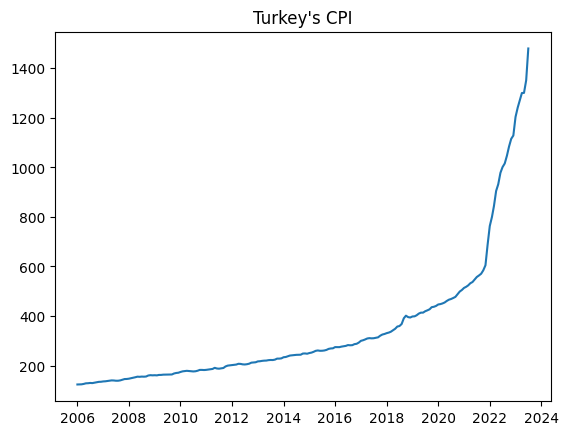

In [158]:
dates=pd.date_range('2006-01-01','2024-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
df10=pd.DataFrame()

v=np.array(tüfe.values)
v=v.flatten()
df10["Inflation"]=v
df10=df10.set_index(dates)
df10=df10.dropna(axis=0)
plt.figure()
plt.title("Turkey's CPI")

plt.plot(df10)
plt.show()

In [159]:
df10=df10.drop(df10.index[210])
df10

,Inflation
2006-01-01,123.57
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.2
...,...
2023-02-01,1241.33
2023-03-01,1269.75
2023-04-01,1300.04
2023-05-01,1300.6


In [160]:
import pandas as pd

temmuz_2023_tufe = 1479.87
yuzdesel_artis_degerleri = list(df9["Prediction"])

# Temmuz 2023 TÜFE değeri için tarih oluşturuyoruz
temmuz_2023_tarih = pd.to_datetime('2023-07-01')

# Yeni TÜFE değerlerini hesaplayalım ve bir listeye ekleyelim
yeni_tufe_degerleri = [temmuz_2023_tufe]
for yuzdesel_artis in yuzdesel_artis_degerleri:
    yeni_tufe_degerleri.append(yeni_tufe_degerleri[-1] * (1 + yuzdesel_artis / 100))

# Ay isimlerini oluşturalım (Temmuz 2023'ten başlayarak bir ay artırarak)
ay_isimleri = [temmuz_2023_tarih]
for i in range(1, 31):
    yeni_tarih = temmuz_2023_tarih + pd.DateOffset(months=i)
    ay_isimleri.append(yeni_tarih)

# Yeni TÜFE değerlerini içeren DataFrame'i oluşturalım
df_yeni_tufe = pd.DataFrame({
    'Tarih': ay_isimleri,
    'Yeni TÜFE': yeni_tufe_degerleri
})

# Sonuçları ekrana yazdıralım

df_yeni_tufe=df_yeni_tufe.set_index("Tarih")
df_yeni_tufe.columns=["Inflation"]
df11=pd.concat([df10,df_yeni_tufe])
df11

,Inflation
2006-01-01,123.57
2006-02-01,123.84
2006-03-01,124.18
2006-04-01,125.84
2006-05-01,128.2
...,...
2025-09-01,3547.968027
2025-10-01,3666.454391
2025-11-01,3786.624597
2025-12-01,3919.297534


In [161]:
index = dates=pd.date_range('2006-01-01','2026-08-01' , freq='1M')-pd.offsets.MonthBegin(1)
df12 = pd.DataFrame(df11)

# 2006 öncesi verileri dolduralım
tufe_artis_oranlari = [7.9, 8.15, 8.16, 8.83, 9.86, 10.12, 11.69, 10.26, 10.55, 9.98, 9.86, 9.65]


# 2006 sonrası için TÜFE artış oranlarını hesaplayalım
df12['TÜFE Artış Oranı'] = df12['Inflation'].pct_change(periods=12) * 100

df12.iloc[0:12,1]=tufe_artis_oranlari
df13=df12.iloc[0:211,1]
df13


2006-01-01     7.900000
2006-02-01     8.150000
2006-03-01     8.160000
2006-04-01     8.830000
2006-05-01     9.860000
                ...    
2023-03-01    50.508511
2023-04-01    43.684170
2023-05-01    39.585301
2023-06-01    38.213519
2023-07-01    47.834730
Name: TÜFE Artış Oranı, Length: 211, dtype: float64

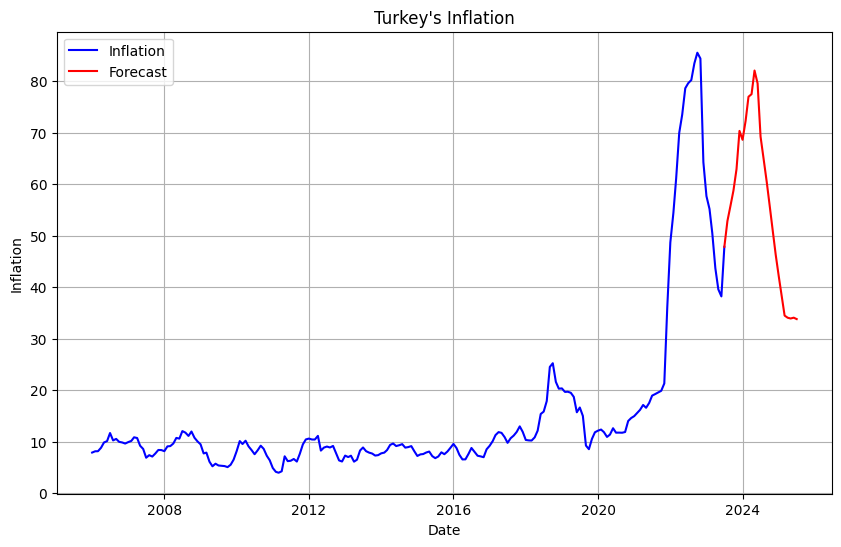

In [162]:
dates=pd.date_range('2006-01-01','2025-08-01' , freq='1M')-pd.offsets.MonthBegin(1)





forecast=df12.iloc[210:235,1]

# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(df13.index, df13, label='Inflation', color='blue')
plt.plot(forecast.index, forecast.values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Inflation')
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()
